# Imports

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib as mtl
import matplotlib.pyplot as plt
import numpy as np
import os
sns.set_style('darkgrid')

%matplotlib inline

# Getting the data

I used the os feature of python to extract the filepath of the file that i want and then accordingly get put it into a dataframe that i called df. This is done in order to make the file readable regardless of the platform it is on.

In [6]:
pwd = os.getcwd()
path = os.path.join(pwd, 'heart.csv')
df = pd.read_csv(path)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In this part of the notebook we will be exploring and understanding the data all together. For the features and columns that exist within this dataset, the corresponding information is provided below

Data contains:

- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As we can see, all of the data is ints and only the oldpeak feature is float64

In [9]:
df.shape

(303, 14)

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There were no null values in my dataset

<AxesSubplot:>

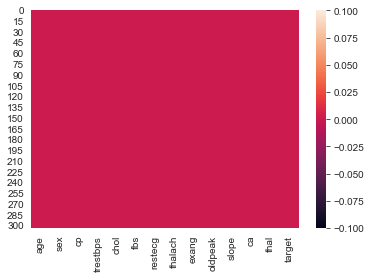

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Down here I have created a correlation matrix and visualised it using a heatmap from seaborn. It helps me understand the how well each attribute correlates with another attribute in the dataset

<AxesSubplot:>

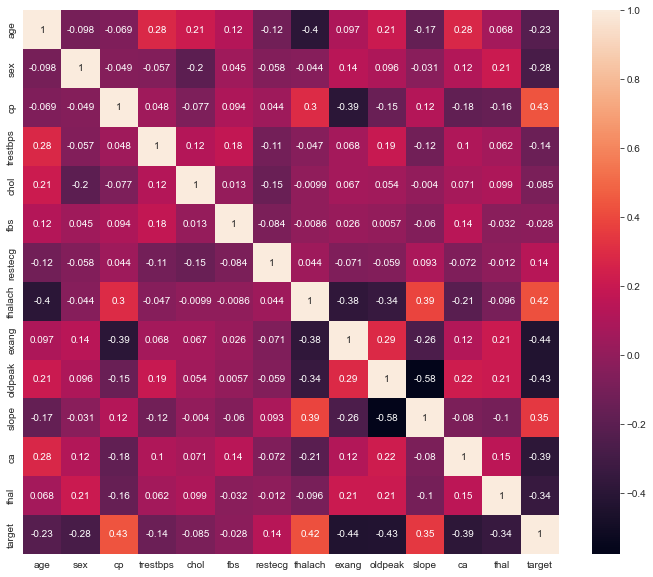

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

We are now finding the correlation of each attribute when compared to our target value

In [16]:
corr_val = df.corr()['target'].sort_values(ascending=False) 
corr_val

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

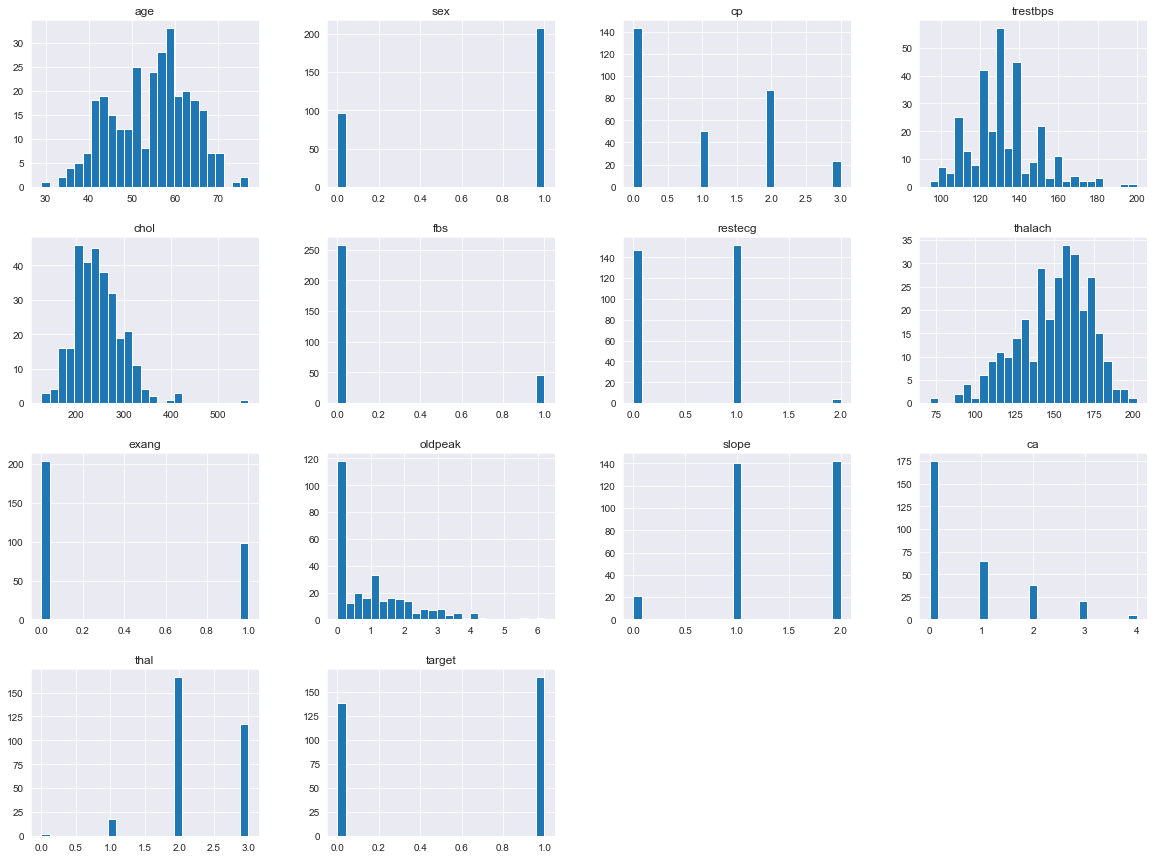

In [17]:
df.hist(bins=25, figsize=(20,15))
plt.show()

Finding all the amount of unique values that exist for each column, this will allow us to understand the difference between our numerical data and our categorical data.

In [18]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## Seperating categorical data from numerical data

In [19]:
cat = []
num = []
for i in df.nunique().index:
    if df.nunique()[i] < 10:
        cat.append(i)
    else:
        num.append(i)

In [20]:
df_cat = df[cat].copy()
df_cat

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [21]:
df_num = df[num].copy()
df_num

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


# Exploring Categorical Data

In [22]:
for i in df_cat:
    print(df_cat[i].value_counts())

1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
0    258
1     45
Name: fbs, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64
0    204
1     99
Name: exang, dtype: int64
2    142
1    140
0     21
Name: slope, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
2    166
3    117
1     18
0      2
Name: thal, dtype: int64
1    165
0    138
Name: target, dtype: int64


Understanding how each of the categorical features have what sort of values and how frequent does each unique value appear within each column

array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

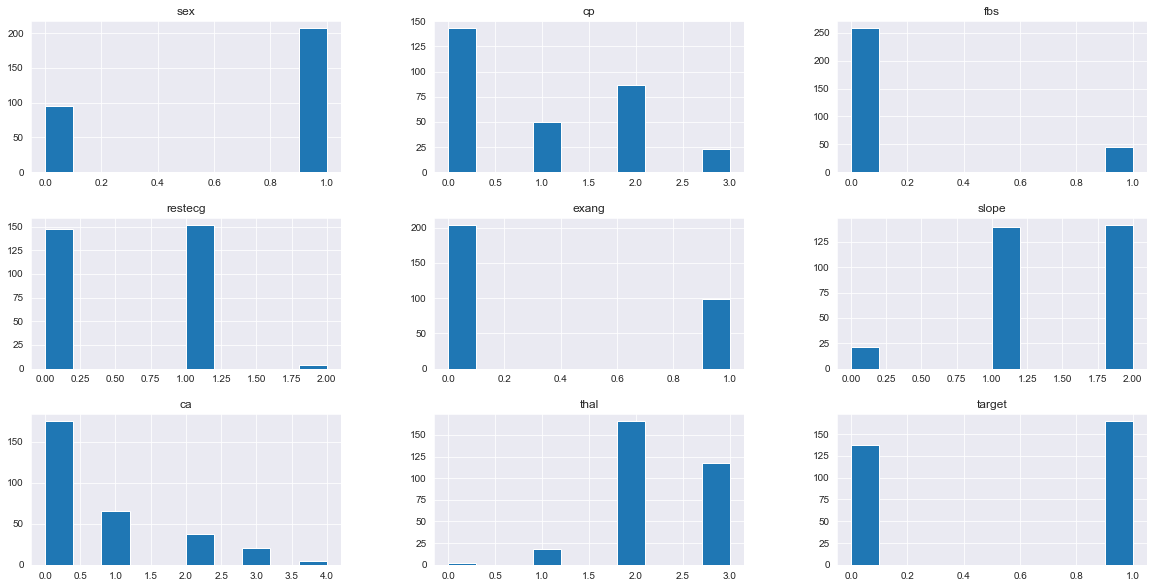

In [23]:
df_cat.hist(figsize=(20, 10))

Finding out correlations between the categorical data

<AxesSubplot:>

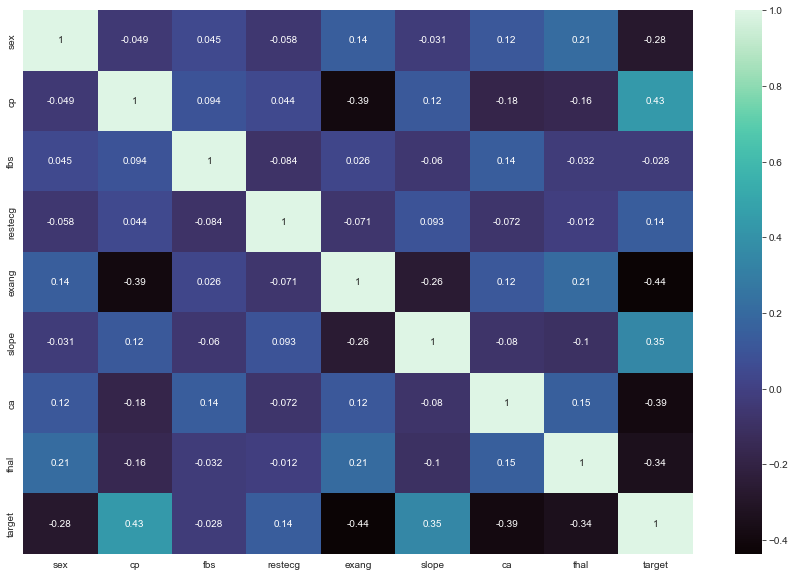

In [24]:
plt.figure(figsize=[15, 10])
sns.heatmap(df_cat.corr(), annot=True, cmap='mako')

### Understanding how each of the columns relate to each other and if we can uncover some interesting relations between the data

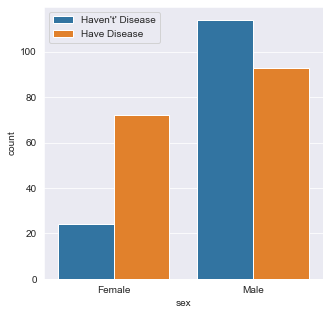

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_cat,x='sex',hue='target')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
plt.legend(["Haven't' Disease", 'Have Disease'])

([<matplotlib.axis.XTick at 0x226ae0d9760>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

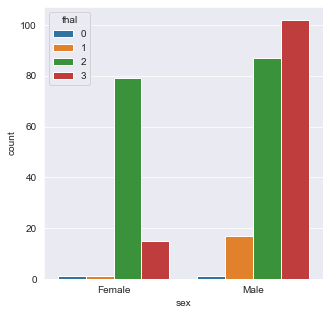

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(data=df_cat,x='sex',hue='thal')
plt.xticks(ticks = [0,1], labels = ['Female','Male'])
# plt.legend(["Haven't' Disease", 'Have Disease'])

# Exploring Numerical Data

Plotting out numerical data

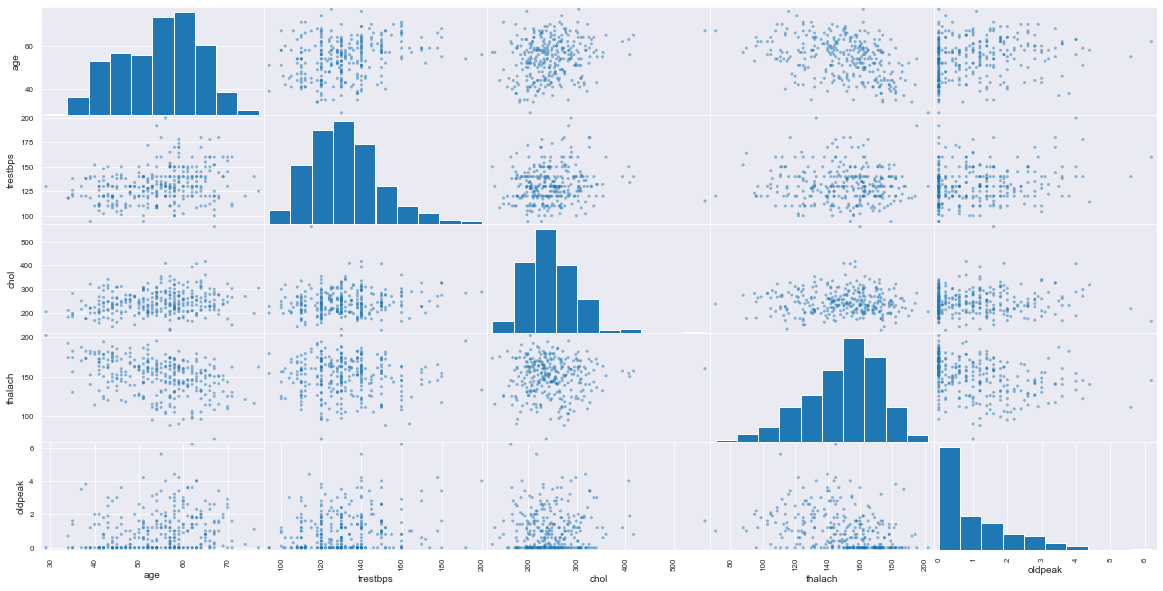

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_num, figsize=(20, 10))
plt.show()

As we can see, we have outliers in our data and we will have to handle them

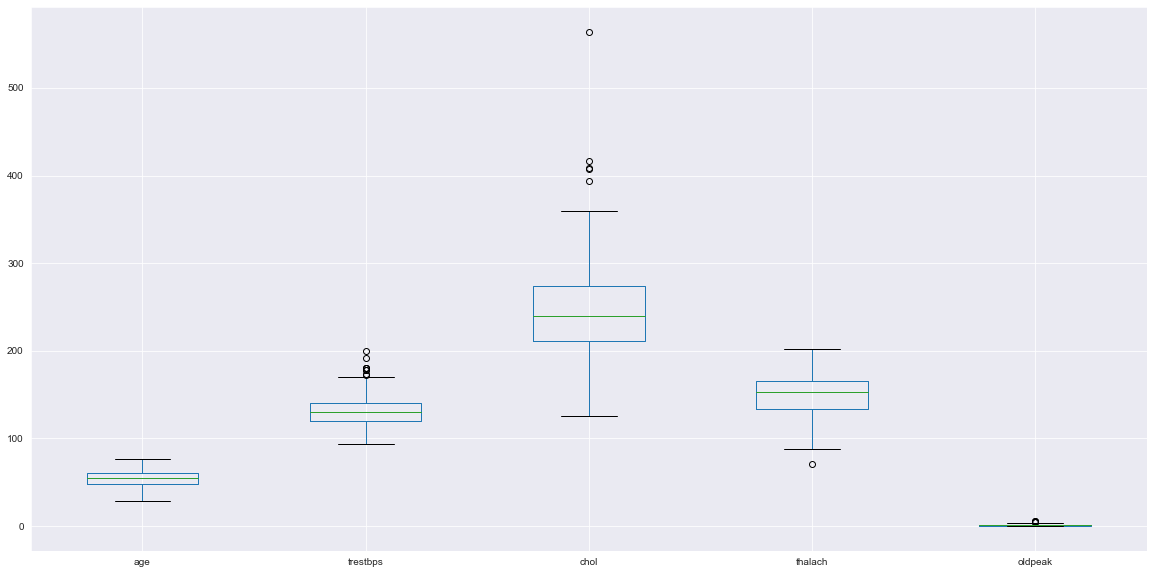

In [28]:
from pandas.plotting import boxplot
boxplot(df_num, figsize=(20, 10))
plt.show()

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python\Python39\lib\site-packages\seaborn\_dec

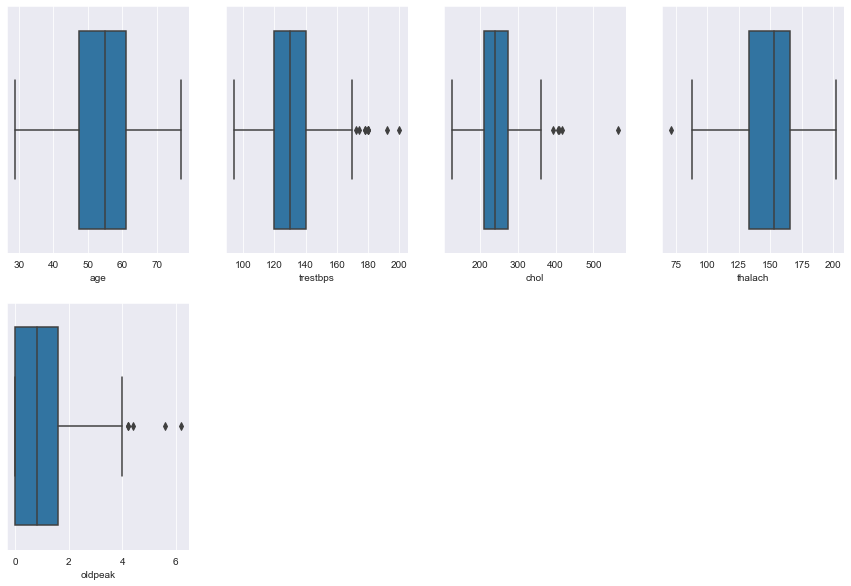

In [29]:
plt.figure(figsize=[15, 10])
for i in range(len(df_num.columns)):
    plt.subplot(2, 4 ,i + 1)
    sns.boxplot(df_num[df_num.columns[i]])
plt.show()

In [30]:
df_num.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


<AxesSubplot:>

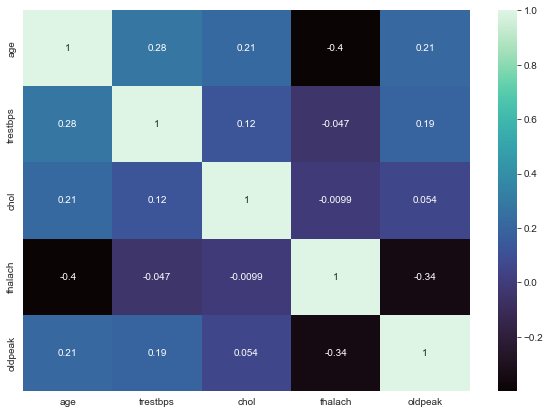

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(df_num.corr(), annot=True, cmap='mako')

## Reconciling the numerical and categorical data

Through reconciling the both, I will be able to deduct any sort of interesting relationships that I can get, such as if some data may seem to work better as nominal or ordinal data and etc. 

When compare the amount of people who have had a heart attack as well as the slope attribute, we can see that for certain categories, such as the downsloping there are a higher amount of negative correlations than compared to positive when put in comparison against the positive values

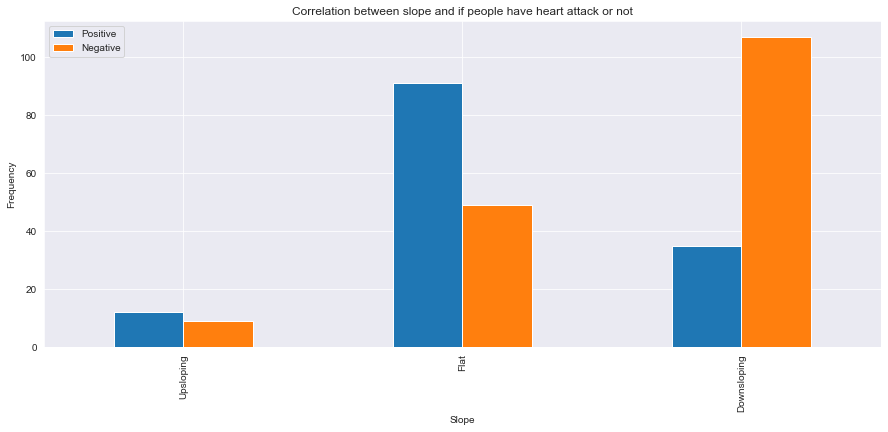

In [32]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Correlation between slope and if people have heart attack or not')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.xticks(ticks = [0,1,2], labels = ['Upsloping','Flat', 'Downsloping'])
plt.legend(["Positive", 'Negative'])
plt.show()

I could not seem to find a specific correlation for this comparison that but there is a trend of the positive value going down

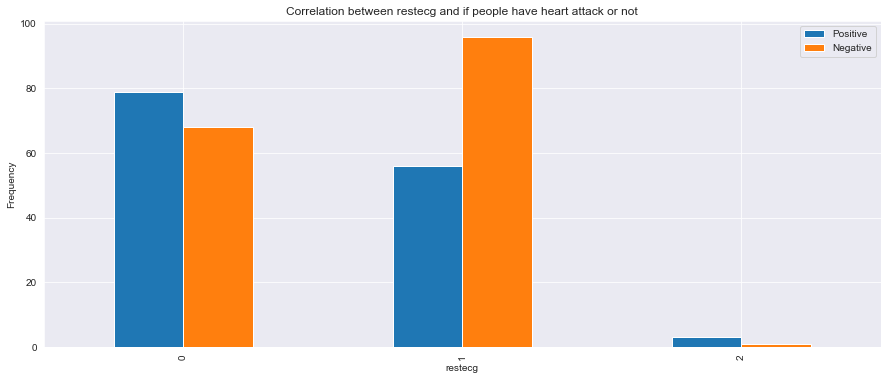

In [33]:
pd.crosstab(df['restecg'],df.target).plot(kind="bar",figsize=(15,6))
plt.title('Correlation between restecg and if people have heart attack or not')
plt.xlabel('restecg')
plt.ylabel('Frequency')
# plt.xticks(ticks = [0,1,2], labels = ['Upsloping','Flat', 'Downsloping'])
plt.legend(["Positive", 'Negative'])
plt.show()

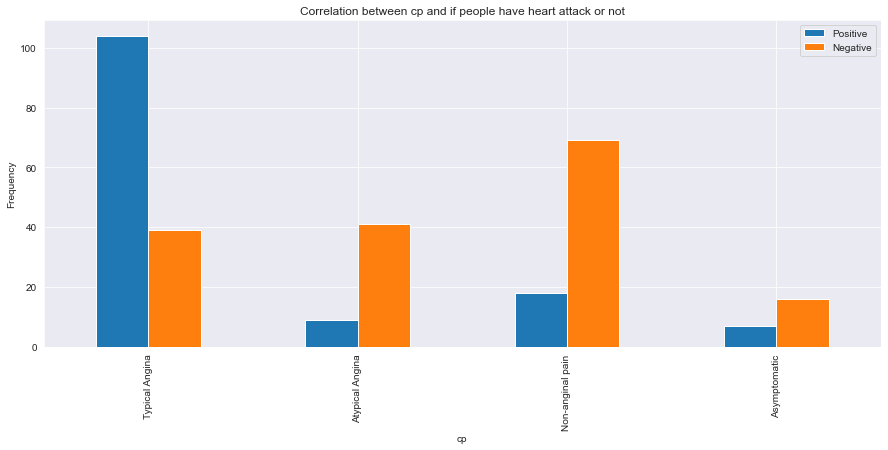

In [34]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Correlation between cp and if people have heart attack or not')
plt.xlabel('cp')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2, 3],labels=["Typical Angina", 'Atypical Angina', 'Non-anginal pain', 'Asymptomatic'])
plt.legend(["Positive", 'Negative'])
plt.show()

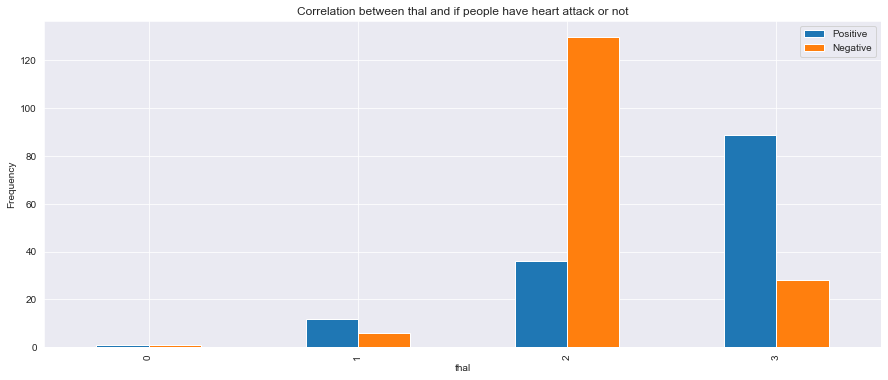

In [35]:
pd.crosstab(df.thal,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Correlation between thal and if people have heart attack or not')
plt.xlabel('thal')
plt.ylabel('Frequency')
# plt.xticks(ticks=[0, 1, 2, 3],labels=["Typical Angina", 'Atypical Angina', 'Non-anginal pain', 'Asymptomatic'])
plt.legend(["Positive", 'Negative'])
plt.show()

Understanding how age and trestbps may have an effect if the patient is more positive or more negative

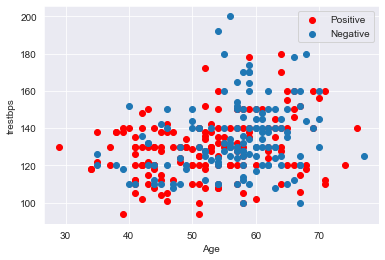

In [36]:
plt.scatter(x=df.age[df.target==1], y=df.trestbps[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.trestbps[(df.target==0)])
plt.legend(["Positive", 'Negative'])
plt.xlabel("Age")
plt.ylabel("trestbps")
plt.show()

Over here we can see that if you have a higher thalach it can significantly raise the chances of being labeled positive

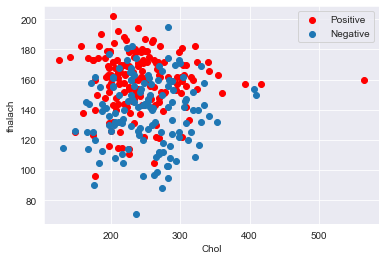

In [37]:
plt.scatter(x=df.chol[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.chol[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Positive", 'Negative'])
plt.xlabel("Chol")
plt.ylabel("thalach")
plt.show()

Over here we can see that if you are older you are more likely to be tested negative, but if you are younger you are more like to be positive

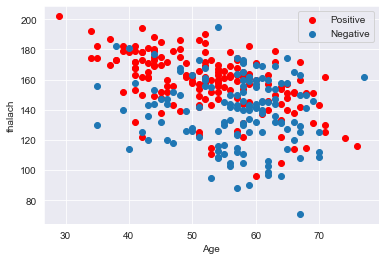

In [38]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Positive", 'Negative'])
plt.xlabel("Age")
plt.ylabel("thalach")
plt.show()


# Preprocessing Data

In [39]:
df_cat.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
       'target'],
      dtype='object')

### Seperating the binary from the nonbinary data

This will help me find the nominal and ordinal values if any within the data and accordinly use ordinal encoding or one hot encoding, this can be applied on non binary categorical data but not on binary because it already done. 

In [40]:
# seperating the non binary data from the binary
binary = []
nonbinary = []
for i in df_cat.nunique().index:
    if df.nunique()[i] == 2:
        binary.append(i)
    else:
        nonbinary.append(i)

In [41]:
binary

['sex', 'fbs', 'exang', 'target']

### Description of binary data


sex: sex (1 = male; 0 = female)

fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

exang: exercise induced angina (1 = yes; 0 = no)

In [42]:
nonbinary

['cp', 'restecg', 'slope', 'ca', 'thal']

### Description of non binary data
cp: chest pain type:

        - Value 0: typical angina

        - Value 1: atypical angina

        - Value 2: non-anginal pain
        
        - Value 3: asymptomatic


restecg: resting electrocardiographic results:

        - Value 0: normal

        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)

        - Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria

slope: the slope of the peak exercise ST segment:

        - Value 0: upsloping

        - Value 1: flat

        - Value 2: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [43]:
corr_val = df.corr()['target'].abs().sort_values(ascending=False)
corr_val

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

## Sorting out the data according the how much correlation they can provide

In [44]:
highest_corr_features = ['cp_0', 'cp_1', 'cp_2', 'cp_3', 'thalach', 'sl_0', 'sl_1', 'sl_2', 'oldpeak', 'exang']
lowest_corr_features = ['fbs', 'chol', 'restecg', 'trestbps']
highex_corr_featrues = ['exang', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thalach', 'oldpeak', 'ca', 'sl_0', 'sl_1', 'sl_2']

I basically take the df and make new columns for the data points that are non binary and then seperate them into different columns which will make it true for wherever that value appears. So for example in the list [1,2,1,2,3,4] and we one hot encode it, the it will make 4 different columns for the unique values that are there, and in each column, wherever that number appears, it puts a true value in the numerical format of 1, otherwise it places 'dummy values' of 0 wherever it is false.

In [45]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

Over here i take the nominal features and one hot encode those features and then split my target value from my main dataset as well as make a new dataset without the target value for the each of the correlations to how to they may effect the way my code runs. 

In [46]:
def preprocess_inputs(df, scaler):
    df = df.copy()
    
    # One-hot encode the nominal features
    nominal_features = ['cp', 'slope', 'restecg', 'ca', 'thal']
    df = onehot_encode(df, dict(zip(nominal_features, ['cp', 'sl'])))
    
    # Split df into X and y
    y = df['target'].copy()
    X = df.drop('target', axis=1).copy()
    
    # Scale and make my dataset
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    high_corr = X[highest_corr_features]
    low_corr = X[lowest_corr_features]
    highex_corr = X[highex_corr_featrues]

    return X, y, high_corr, low_corr, highex_corr
    

I use the robust scaler because it is good for handling outlier values as it used the Interquartile range, thus there are no possiblities of outliers adversely affecting my dataset.

In [47]:
from sklearn.preprocessing import RobustScaler

X_r, y_robust, Xr_high, Xr_low, Xr_highex = preprocess_inputs(df, RobustScaler())

I made this function to convert my y value from binary numerical data into positive and negative

In [48]:
def y_converter(y):
    y_target = y.copy()
    y_target = y_target.map({0:'Positive', 1:'Negative'})
    return y_target

In [49]:
y_r = y_converter(y_robust)

# Machine Learning Models

In [159]:
from sklearn.model_selection import train_test_split

# splitting my data into test and train data 
def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42)

    return X_train, X_test, y_train, y_test

# All data
Xr_train, Xr_test, yr_train, yr_test = split(X_r, y_r)

# Highly correlating values
Xrh_train, Xrh_test, yrh_train, yrh_test = split(Xr_high, y_r)

# Lowest correlating values
Xrl_train, Xrl_test, yrl_train, yrl_test = split(Xr_low, y_r)

# Combination of highest and lowest correlating values
Xrhl_train, Xrhl_test, yrhl_train, yrhl_test = split(Xr_highex, y_r)


In [51]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Naive Bayes

This is where I place my ML algorithm which in this case is a Naive Bayes algorithm. First i make a variable to represent the GaussianNB ML model and call it gnb, which is then used to fit the data dn predict the data on the X_test. We make a confusion matrix to understand how well our data predicted the data presented to it in the X_test to predict its target values, then accordingly we took metrics of the data provided and provided the sensitivity, the specificity, recall, precision, accuracy, f1 of our data and also plotted a ROC curve to better measure how well our model performs. 

In [52]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

def NB_alg(X_train, X_test, y_train, y_test):

    #using the model to predict
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    y_train_pred = cross_val_predict(gnb, X_train, y_train, cv=3)

    # creating the confusion matrix to analyse our data
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Sensitivity of our data
    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity : ', 100*sensitivity )

    # Specificity of our data
    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity : ', 100*specificity)

    # Getting the precision, recall, accuracy and f1 scores of our data
    precision = 100*precision_score(y_train, y_train_pred, pos_label='Positive')
    recall = 100*recall_score(y_train, y_train_pred, pos_label='Positive')
    accuracy = 100*accuracy_score(y_train, y_train_pred)
    f1 = 100*f1_score(y_train, y_train_pred, pos_label='Positive')


    print('Precision Score: ', 100*precision_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Recall Score: ', 100*recall_score(y_train, y_train_pred, pos_label='Positive')) 
    print('Accuracy Score: ', 100*accuracy_score(y_train, y_train_pred)) 
    print('F1 Score: ', 100*f1_score(y_train, y_train_pred, pos_label='Positive'))
    print(classification_report(y_train, y_train_pred))

    #Plotting the confusion matrix
    sns.heatmap(conf_matrix, annot=True)
    plt.show()

    #Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = gnb.predict_proba(X_test)[: ,0], pos_label='Negative')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Negative Rate")
    plt.ylabel("True Negative Rate (Recall)")
    print('Negative AUC: ',auc(fpr,tpr))
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = gnb.predict_proba(X_test)[: ,1], pos_label='Positive')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.show()
    print('Positive AUC: ', auc(fpr,tpr))

    return precision, recall, accuracy, f1
    

I am testing all of my features over here 

Sensitivity :  89.1891891891892
Specificity :  79.48717948717949
Precision Score:  70.09345794392523
Recall Score:  72.81553398058253
Accuracy Score:  73.568281938326
F1 Score:  71.42857142857142
              precision    recall  f1-score   support

    Negative       0.77      0.74      0.75       124
    Positive       0.70      0.73      0.71       103

    accuracy                           0.74       227
   macro avg       0.73      0.74      0.73       227
weighted avg       0.74      0.74      0.74       227



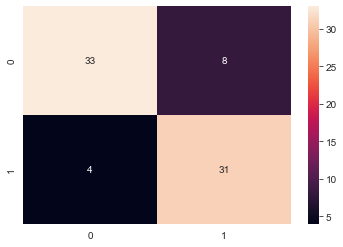

Negative AUC:  0.8982578397212544


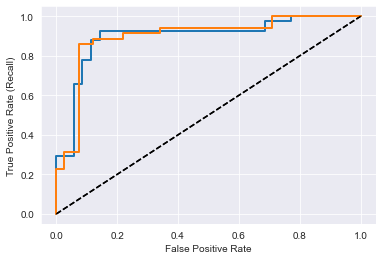

Positive AUC:  0.8982578397212544


(70.09345794392523, 72.81553398058253, 73.568281938326, 71.42857142857142)

In [53]:
# All features
NB_alg(Xr_train, Xr_test, yr_train, yr_test)

Only testing the highly correlated features here 


Sensitivity :  85.0
Specificity :  80.55555555555556
Precision Score:  73.68421052631578
Recall Score:  67.96116504854369
Accuracy Score:  74.44933920704845
F1 Score:  70.70707070707071
              precision    recall  f1-score   support

    Negative       0.75      0.80      0.77       124
    Positive       0.74      0.68      0.71       103

    accuracy                           0.74       227
   macro avg       0.74      0.74      0.74       227
weighted avg       0.74      0.74      0.74       227



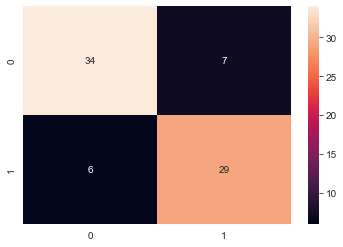

Negative AUC:  0.8655052264808363


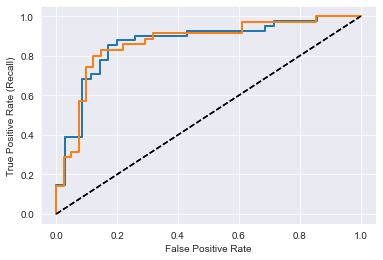

Positive AUC:  0.8655052264808362


(73.68421052631578, 67.96116504854369, 74.44933920704845, 70.70707070707071)

In [54]:
# Highest correlating values
NB_alg(Xrh_train, Xrh_test, yrh_train, yrh_test)

Testing the lowest correlating values 

Sensitivity :  87.17948717948718
Specificity :  81.08108108108108
Precision Score:  70.70707070707071
Recall Score:  67.96116504854369
Accuracy Score:  72.68722466960352
F1 Score:  69.30693069306932
              precision    recall  f1-score   support

    Negative       0.74      0.77      0.75       124
    Positive       0.71      0.68      0.69       103

    accuracy                           0.73       227
   macro avg       0.72      0.72      0.72       227
weighted avg       0.73      0.73      0.73       227



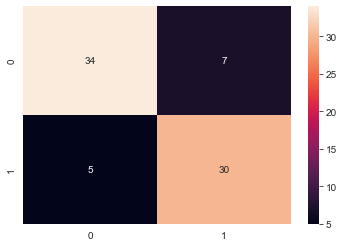

Negative AUC:  0.8766550522648083


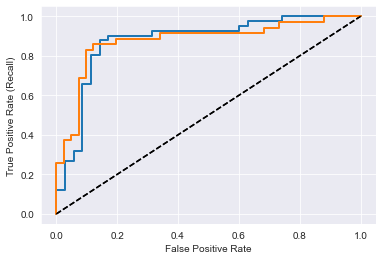

Positive AUC:  0.8766550522648083


(70.70707070707071, 67.96116504854369, 72.68722466960352, 69.30693069306932)

In [55]:
# Lower amount of  Highest correlating values combined
NB_alg(Xrhl_train, Xrhl_test, yrhl_train, yrhl_test)

Just testing a lower amount of higher correlating values 

Sensitivity :  68.29268292682927
Specificity :  62.857142857142854
Precision Score:  42.857142857142854
Recall Score:  34.95145631067961
Accuracy Score:  49.33920704845815
F1 Score:  38.50267379679144
              precision    recall  f1-score   support

    Negative       0.53      0.61      0.57       124
    Positive       0.43      0.35      0.39       103

    accuracy                           0.49       227
   macro avg       0.48      0.48      0.48       227
weighted avg       0.48      0.49      0.49       227



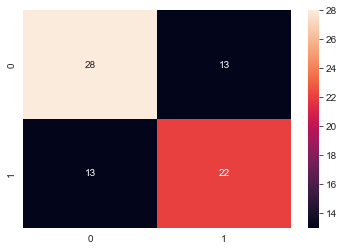

Negative AUC:  0.645993031358885


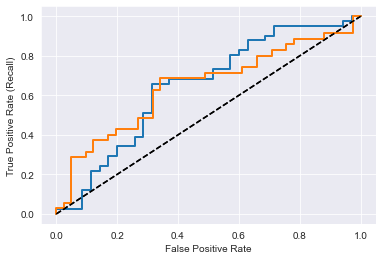

Positive AUC:  0.6459930313588851


(42.857142857142854, 34.95145631067961, 49.33920704845815, 38.50267379679144)

In [56]:
# Lowest correlating values 
NB_alg(Xrl_train, Xrl_test, yrl_train, yrl_test)

# Conclusion 

I first analysed my data set to understand the different relationships between different features within the dataset and plotted graphs to provide a visual understanding of the dataset in hand. It helped me take into consideration the types of features that are there, which ones are categorical and numerical, and to further break it down which categorical variables are binary and non binary. Such relationships are important because we would have to prepare some data accordingly to provide the algorithm an easier time to calculate the different features and consequently provide us with a good prediction. 

As I prepared my data, I looked into factors of the non binary data and checked were potentially ordinal not ordinal, such as the slope feature, and thus used a one hot encoder for the non ordinal data and re-defined my dataset accordingly. I then split my data into X and y, y being the target data and X having all the data except for the target data. Then to further split my data, I split it into X_train, X_test, y_train and y_test parts. At this point, I have created 3 different types for each variable in order to encompass 3 different variations of my dataset, which includes a higher amount of the highest correlating vairables in my dataset, then a lower amount of the highest correlating features within my dataset and finally just a dataset with the lowest correlating features. These features and their correlation are acheived through the using df.corr() and sorting the values in a manner which allows me to view the highest correlating features. I also used Robust Scaler in order to scale my data, I used this specific scaler as it only takes the interquartile range of my data into consideration thus elimanating the possibility of anomalies within the data interfering with the prediction that will take place. 

Then I created an instance for the GaussianNB ML algorithm and included important metrics such as the sensitivity, specificity, accuracy, f1-score, recall score and also plotted a confusion matrix and the ROC curve to further analyse how the features that are placed into consideration are working together and how effectively can I produce a score that has a higher accuracy rate. From the results above that are gathered, I can deduce the highest amount of highest correlating features has produced the best result with a higher accuracy. 

# CLUSTERING -----------------------------------------------

- Use k means to find clusters in the dataset
- evaluate accuracy, visualise and make conclusions 
- try different clustering algorithms 
    - EM
    - GMM 
    - Hierarchical
- Vary number of clusters manuyrally and research some of the existing algs to compute the optimal number of clusters
    - How does it affect the accuracy of the clustering 
    - Make conclusions 
- Look up methods to determine the optimal number of clusters
    - silhouette
    - elbow 
    - cluster validity
    - similarity measures
- Explain pros and cons of using different clustering algs on dataset and compare the results of the bayesian classification on the same dataset.

- Try using PCA 
- Try Hierarchical Clustering
- 

# PCA (Principle Component Analysis)
### Dimensionality Reducation

In [57]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

I am using the scaler above here in order to make sure the data is evenly evaluated while doing dimensionality reduction using PCA.

In [59]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [60]:
pca_variance = pca.explained_variance_ratio_
pca_variance

array([0.23581966, 0.11229748, 0.08800207, 0.08618849, 0.07300207,
       0.06929774, 0.06165962, 0.05543521, 0.05208534, 0.04448005,
       0.03817159, 0.03071669, 0.02656258, 0.02628139])

In [61]:
pca_variance_df = pd.DataFrame({'Variance %': pca_variance*100})
pca_variance_df

,Variance %
0,23.581966
1,11.229748
2,8.800207
3,8.618849
4,7.300207
5,6.929774
6,6.165962
7,5.543521
8,5.208534
9,4.448005


The dataframe above displays the variance and thus the amount of data from the original dataset that is divided into the PCs above

<AxesSubplot:ylabel='Variance %'>

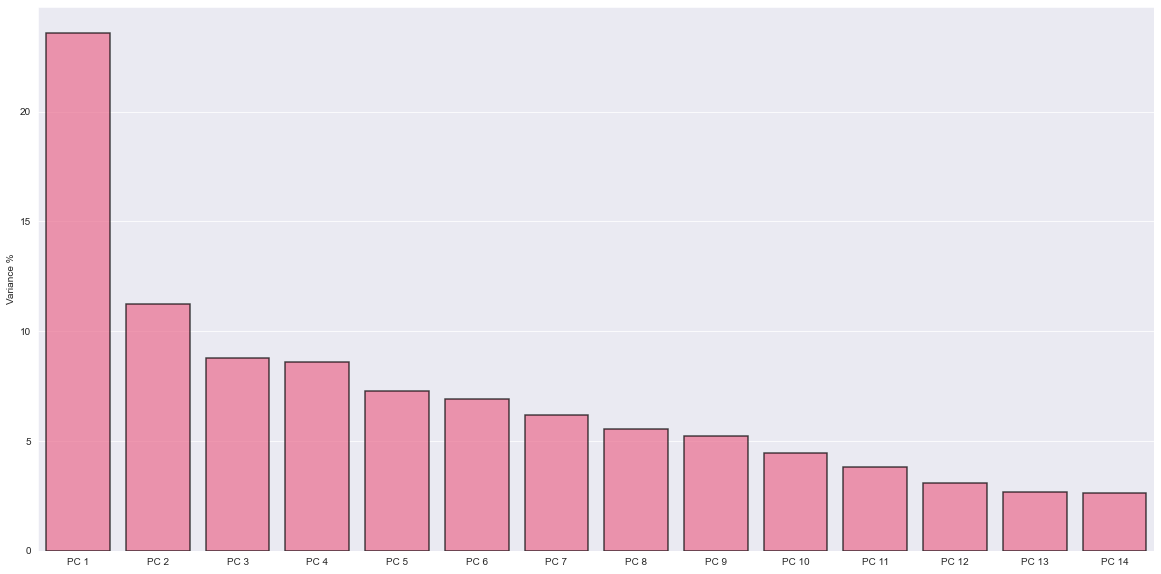

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(x = ['PC ' + str(i) for i in range(1, 15)], 
                    y = pca_variance_df['Variance %'], 
                    linewidth = 1.5, 
                    edgecolor = 'k', 
                    color = '#ff5886', 
                    alpha = 0.7)

The plot above shows the distrubution of how much data is contained within each PC, all the PCs when added up together should show 100% of the data, unfortunately in this case, the amount data in the first PC is relativaly low at around 23.5%, this makes it so that a higher amount of PC's would be requred which would make it computationally expensive.

In [63]:
#Asking sklearn and numpy to tell me how many PC's are required to fit about 95% of the data 
cumsum = np.cumsum(pca_variance)
d = np.argmax(cumsum>=0.95)
print('Amount of the PCs required to reach 95 percent of the data:', d)

Amount of the PCs required to reach 95 percent of the data: 12


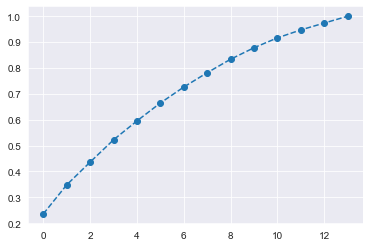

In [64]:
plt.plot(cumsum,  marker = 'o', linestyle = '--')

The plot above lets me know of the ideal number of PC's required to reach about 95% of the data at least, and this case that would be 12 PC's, unfortunately this is still a very high number of dimensions, thus if this was a far larger dataset, it would become computationally expensive.

In [65]:
pca_12comp = PCA(n_components=12)
pca_12comp.fit(scaled_df)
pca_scores = pca_12comp.transform(scaled_df)
SSE = []
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)
    SSE.append(kmeans_pca.inertia_)

elbow_plot_data =  pd.DataFrame({'Number of Clusters': range(1, 15), 'SSE Value': SSE})

In [66]:
elbow_plot_data

,Number of Clusters,SSE Value
0,1,4017.835875
1,2,3263.237429
2,3,3019.896450
3,4,2826.304011
4,5,2671.693232
5,6,2548.100279
6,7,2463.922926
7,8,2363.703618
8,9,2296.666048
9,10,2226.108662


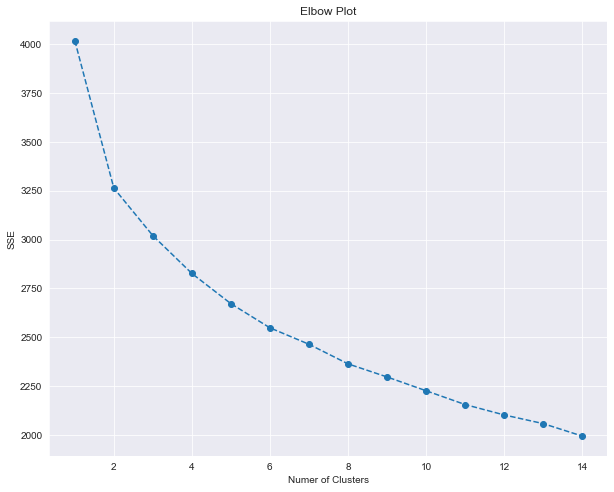

In [67]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), SSE, marker = 'o', linestyle = '--')
plt.xlabel('Numer of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Plot')
plt.show()

# K-means clustering

According to the elbow plot above, we can see that after 2 number of clusters there is a gradual decrease instead a sudden drops, this indicates the amount of clarity in the clusters drastically decreases after two clusters, thus simulataneously showing that 2 clusters should be ideal enough.

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn.metrics as metrics

silhouette = []
for num_clusters in range(2,16):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, labels)
    silhouette.append(silhouette_avg)
    print("For clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For clusters = 2, the silhouette score is 0.17822002980099796
For clusters = 3, the silhouette score is 0.12168148322057608
For clusters = 4, the silhouette score is 0.12016052064856288
For clusters = 5, the silhouette score is 0.11001920363574767
For clusters = 6, the silhouette score is 0.10984385817191686
For clusters = 7, the silhouette score is 0.11528254713287281
For clusters = 8, the silhouette score is 0.1101299032494735
For clusters = 9, the silhouette score is 0.10304475266621221
For clusters = 10, the silhouette score is 0.097511007915243
For clusters = 11, the silhouette score is 0.1101508770646742
For clusters = 12, the silhouette score is 0.10019778852770142
For clusters = 13, the silhouette score is 0.1050934679481695
For clusters = 14, the silhouette score is 0.09096872193818673
For clusters = 15, the silhouette score is 0.10436263755253526


In [69]:
silhoutte_score_plot =  pd.DataFrame({'Number of Clusters': range(1, 15), 'Silhouette Average Value': silhouette})
silhoutte_score_plot

,Number of Clusters,Silhouette Average Value
0,1,0.178220
1,2,0.121681
2,3,0.120161
3,4,0.110019
4,5,0.109844
5,6,0.115283
6,7,0.110130
7,8,0.103045
8,9,0.097511
9,10,0.110151


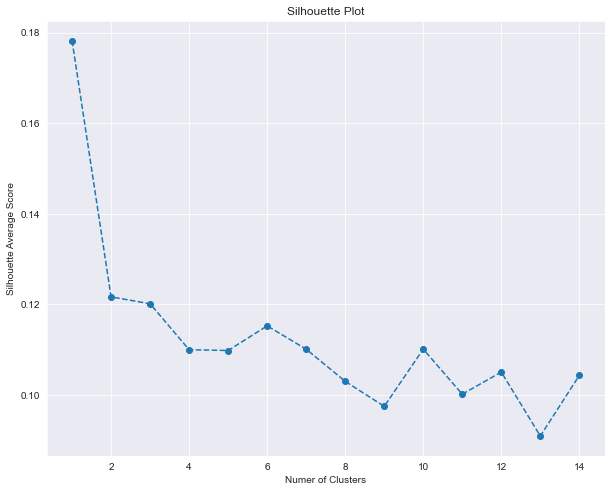

In [70]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), silhouette, marker = 'o', linestyle = '--')
plt.xlabel('Numer of Clusters')
plt.ylabel('Silhouette Average Score')
plt.title('Silhouette Plot')
plt.show()

As we can see above in the silhouette score plot above, it too indicates that the optimum number of clusters in this case is 2 clusters as well.

In [71]:
from sklearn.metrics.cluster import adjusted_rand_score


## Kmeans clustering with 2 clusters

The above graph aids us in finding the ideal number of clusters required 

In [72]:
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=2, random_state=42)

Above we now start ot apply the kmeans algorithm using the ideal number of clusters 

In [73]:
scores = pd.DataFrame(pca_scores)
scores

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.051739,2.624022,0.990054,3.479328,0.362773,1.695836,-0.135706,0.739775,-0.536037,0.967674,-0.530379,-0.469128
1,-0.817441,-0.730375,-0.235928,2.767545,2.258404,-0.808414,-0.104445,1.503700,1.290094,1.111370,-0.342366,-0.469777
2,-2.057599,-0.039098,-0.519839,0.081198,0.860416,0.752783,-0.133915,-0.095343,1.279945,-1.189688,0.368036,-0.157562
3,-1.903043,-0.596701,0.076204,-0.082624,-0.235141,-0.500292,-0.136878,-0.171773,-0.164652,0.702923,-0.609533,-1.152772
4,-0.768371,0.412545,-2.187455,-1.988510,0.017448,-0.074219,1.433544,0.615901,-0.219965,0.871529,0.525989,-0.969506
...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.485287,-0.423483,-1.683247,-0.490555,-0.187162,-0.525461,1.539102,-0.722948,-0.516262,-1.078705,0.249491,0.804541
299,-0.140325,-1.215922,0.138325,0.977923,0.884803,-1.240199,-0.710762,1.047574,-1.478738,0.440635,0.142995,1.634516
300,2.681772,0.593019,1.791015,1.300262,-1.331351,-1.201660,0.558171,0.710281,0.217872,-0.907961,-1.409135,-1.005306
301,2.170858,-2.166992,-0.081516,0.890244,-1.177444,-0.346770,0.462081,-1.163514,-0.461829,-0.973929,0.352957,0.111530


In [74]:
df_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
df_pca_kmeans

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,2,3,4,5,6,7,8,9,10,11
0,63,1,3,145,233,1,0,150,0,2.3,...,0.990054,3.479328,0.362773,1.695836,-0.135706,0.739775,-0.536037,0.967674,-0.530379,-0.469128
1,37,1,2,130,250,0,1,187,0,3.5,...,-0.235928,2.767545,2.258404,-0.808414,-0.104445,1.503700,1.290094,1.111370,-0.342366,-0.469777
2,41,0,1,130,204,0,0,172,0,1.4,...,-0.519839,0.081198,0.860416,0.752783,-0.133915,-0.095343,1.279945,-1.189688,0.368036,-0.157562
3,56,1,1,120,236,0,1,178,0,0.8,...,0.076204,-0.082624,-0.235141,-0.500292,-0.136878,-0.171773,-0.164652,0.702923,-0.609533,-1.152772
4,57,0,0,120,354,0,1,163,1,0.6,...,-2.187455,-1.988510,0.017448,-0.074219,1.433544,0.615901,-0.219965,0.871529,0.525989,-0.969506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,-1.683247,-0.490555,-0.187162,-0.525461,1.539102,-0.722948,-0.516262,-1.078705,0.249491,0.804541
299,45,1,3,110,264,0,1,132,0,1.2,...,0.138325,0.977923,0.884803,-1.240199,-0.710762,1.047574,-1.478738,0.440635,0.142995,1.634516
300,68,1,0,144,193,1,1,141,0,3.4,...,1.791015,1.300262,-1.331351,-1.201660,0.558171,0.710281,0.217872,-0.907961,-1.409135,-1.005306
301,57,1,0,130,131,0,1,115,1,1.2,...,-0.081516,0.890244,-1.177444,-0.346770,0.462081,-1.163514,-0.461829,-0.973929,0.352957,0.111530


In [75]:
df_pca_kmeans.columns.values[-12: ] = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
df_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [76]:
df_pca_kmeans.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'PC1', 'PC2',
       'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
       'Segment K-means PCA'],
      dtype='object')

In [77]:
df_pca_kmeans['Segment'] = df_pca_kmeans['Segment K-means PCA'].map({0: 'first', 1: 'second'})
#df_pca_kmeans['Segment'] = df_pca_kmeans['Segment K-means PCA'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})

In [78]:
df_pca_kmeans['Segment K-means PCA'].value_counts()

1    181
0    122
Name: Segment K-means PCA, dtype: int64

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clusters by PCA components')

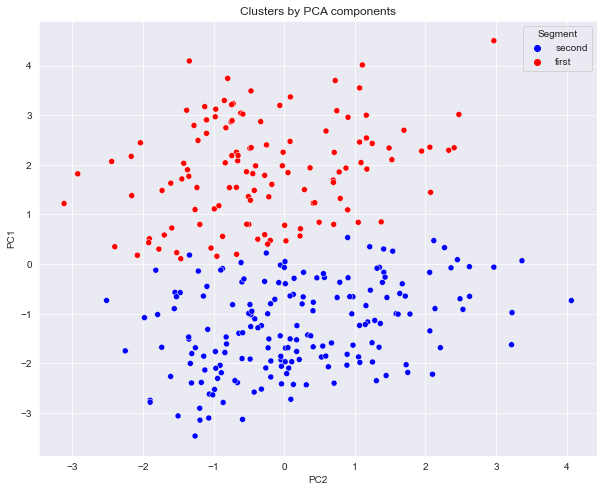

In [79]:
x_axis = df_pca_kmeans['PC2']
y_axis = df_pca_kmeans['PC1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['Segment'], palette= ['b', 'r'])
plt.title('Clusters by PCA components')

## Kmeans clustering with 3 clusters

In [80]:
kmeans_pca3 = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
kmeans_pca3.fit(pca_scores)

KMeans(n_clusters=3, random_state=42)

In [81]:
df_pca_kmeans3 = pd.concat([df.reset_index(drop = True), pd.DataFrame(pca_scores)], axis = 1)
df_pca_kmeans3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,2,3,4,5,6,7,8,9,10,11
0,63,1,3,145,233,1,0,150,0,2.3,...,0.990054,3.479328,0.362773,1.695836,-0.135706,0.739775,-0.536037,0.967674,-0.530379,-0.469128
1,37,1,2,130,250,0,1,187,0,3.5,...,-0.235928,2.767545,2.258404,-0.808414,-0.104445,1.503700,1.290094,1.111370,-0.342366,-0.469777
2,41,0,1,130,204,0,0,172,0,1.4,...,-0.519839,0.081198,0.860416,0.752783,-0.133915,-0.095343,1.279945,-1.189688,0.368036,-0.157562
3,56,1,1,120,236,0,1,178,0,0.8,...,0.076204,-0.082624,-0.235141,-0.500292,-0.136878,-0.171773,-0.164652,0.702923,-0.609533,-1.152772
4,57,0,0,120,354,0,1,163,1,0.6,...,-2.187455,-1.988510,0.017448,-0.074219,1.433544,0.615901,-0.219965,0.871529,0.525989,-0.969506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,-1.683247,-0.490555,-0.187162,-0.525461,1.539102,-0.722948,-0.516262,-1.078705,0.249491,0.804541
299,45,1,3,110,264,0,1,132,0,1.2,...,0.138325,0.977923,0.884803,-1.240199,-0.710762,1.047574,-1.478738,0.440635,0.142995,1.634516
300,68,1,0,144,193,1,1,141,0,3.4,...,1.791015,1.300262,-1.331351,-1.201660,0.558171,0.710281,0.217872,-0.907961,-1.409135,-1.005306
301,57,1,0,130,131,0,1,115,1,1.2,...,-0.081516,0.890244,-1.177444,-0.346770,0.462081,-1.163514,-0.461829,-0.973929,0.352957,0.111530


In [82]:
df_pca_kmeans3.columns.values[-12: ] = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
df_pca_kmeans3['Segment K-means PCA'] = kmeans_pca3.labels_
df_pca_kmeans3['Segment K-means PCA'].value_counts()

0    111
2    109
1     83
Name: Segment K-means PCA, dtype: int64

In [83]:
df_pca_kmeans3['Segment'] = df_pca_kmeans3['Segment K-means PCA'].map({0: 'first', 1: 'second', 2: 'third'})

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clusters by PCA components')

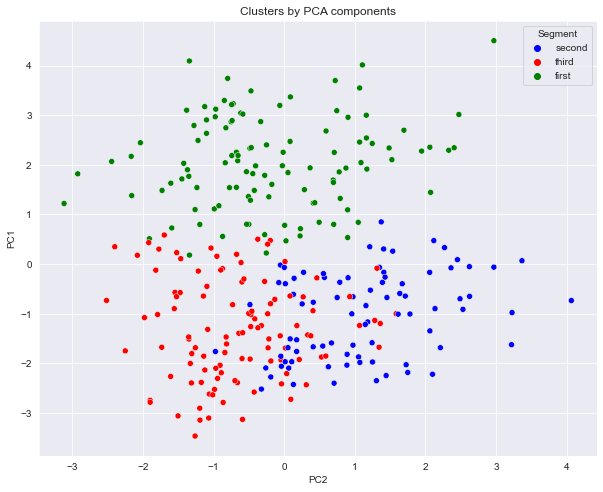

In [84]:
x_axis = df_pca_kmeans['PC2']
y_axis = df_pca_kmeans['PC1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans3['Segment'], palette= ['b', 'r', 'g'])
plt.title('Clusters by PCA components')

Above I repeated K means clustering but this time with 3 different clusters and found out that it did not have as clearly defined clusters as the kmeans clustering earlier with 2 clusters, thus corresponding with the elbow plot analysis.

# Hierarchical Clustering

In [85]:
from scipy.cluster.hierarchy import linkage,dendrogram

### Ward

It is used to consider the distance between two different clusters as the increase in the ESS (error sum of squares) after joining two seperate clusters into one larger cluster.

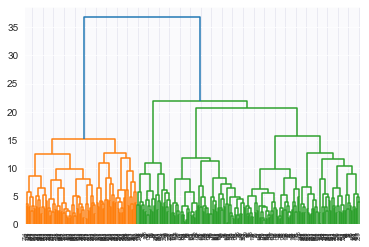

<Figure size 3600x1440 with 0 Axes>

In [86]:
ward=linkage(scaled_df, method="ward")
dendrogram(ward)
plt.figure(figsize=(50,20))
plt.show()

### Single Linkage

In single linkage hierarchical clustering, the distance between two different clusters is known as the shortest distance between two different points within every cluster.

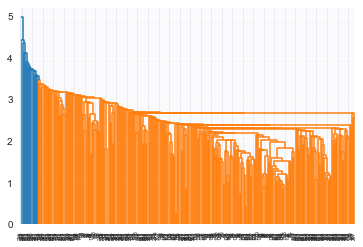

In [87]:
single = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(single)
plt.show()

### Complete

The distance between two different clusters is considered and known as the longest distance between two different points within every cluster.

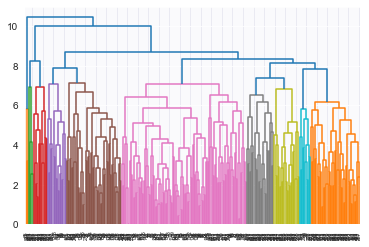

In [88]:
complete = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(complete)
plt.show()

## Conclusion

I would like to conclude by displaying my understanding of this part of the assignment. I first used PCA to reduce the amount of dimensions that exist within my data and then eventually I found the amount of PCs required to reach about 95% of my data which was 12 PC's, thus the I was not able to succesfully reduce the amount of dimensions in my data. Then I started with K means clustering and experiments with a range of clusters from which I plotted an elbow plot in order to determine the optimum amount of clusters, which I found to be 2 and then accordingly plotted my data. I also did it for 3 clusters in order to see what the potential difference would be and saw a disparity between 2 clusters and 3 clusters where the clusters when there were 2 clusters was better defined in comparison to when 3 clusters were used, thus accurately corresponding to the elbow plot. The pros of using a clustering algorithms on a dataset like this is that it can often find relationships in data that could be invisible to the human eye and accordingly we can classify the data so we can get more accurate results, in the case of using Bayesian it is only limited to the classification it makes based upon its algorithm. The cons of using clustering over the bayesian method was that it strictly requires numerical/continuous data, which is something that can be overlooked through doing one hot encoding or other forms of encoding upon categorical data.

# Decision Trees --------------------------------------------------- 

- Make sure that you obtained or created a test set. 

• Use Decision trees (the J48 algorithm) on a training set, measure the accuracy. Then measure the  accuracy  on  the  training  set  using  10-fold  cross-validation.  Record  all  your  findings  and  explain them. Use the major metrics: accuracy, TP rate, FP rate, precision, recall, F measure, the ROC area if needed.

• Repeat  the  experiment,  this  time  using  training  and  testing  data  sets  instead  of  the  cross validation. That is, build the J48 classifier using the training data set, and test the classifier using the test data set. Note the accuracy.Answer the question: Does the decision tree generalizewell to new data? How do you tell?

• Experiment with various decision tree parametersthat control the size of the tree. For example: depthof the tree, confidence threshold for pruning, splitting criteria and the minimal number of instances permissible per leaf. Make conclusions about their influence on the classifier's performance. 

• Make new training and testing sets, by moving 30% of the instances from the original training set into the testing set. Note the accuracies on the training and the testing sets

• Make new training and testing sets, by moving 60% of the instances from the original training set into the testing set. Note the accuracies on the training and the testing sets

• Analyse  your  results  from  the  point  of  view  of  the  problem  of  classifier  over-fitting.Do  you notice the effects of over-fitting? How?Noteyour conclusionsin the Jupyter notebook.

• For higher marks, try some other decision tree algorithms (e.g. random forests). Repeat all of the above experiments and make conclusions.

## Using Decision Trees (1st Part)

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, roc_auc_score


In [90]:
dt = DecisionTreeClassifier(random_state=42)

In [145]:
def DT_alg(X, y, X_train, X_test, y_train, y_test):

    #using the model to predict
    y_pred = dt.fit(X_train, y_train).predict(X_test)

    y_train_pred = cross_val_predict(dt, X_train, y_train, cv=2)
    # creating the confusion matrix to analyse our data
    conf_matrix = confusion_matrix(y_test, y_pred)
    print()
    # Sensitivity of our data
    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity (True Positive Rate): ', 100*sensitivity )

    # Specificity of our data
    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity (True Negative Rate) : ', 100*specificity)

    # Getting the precision, recall, accuracy and f1 scores of our data
    precision = 100*precision_score(y_train, y_train_pred, pos_label='Positive')
    recall = 100*recall_score(y_train, y_train_pred, pos_label='Positive')
    accuracy = 100*accuracy_score(y_train, y_train_pred)
    f1 = 100*f1_score(y_train, y_train_pred, pos_label='Positive')

    print('Precision Score: ', precision) 
    print('Recall Score: ', recall) 
    print('Accuracy Score: ', accuracy) 
    print('F1 Score: ', f1)
    print('')
    print('')
    print('Cross Validation scores:')
    #cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)
    cv_accuracy = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring = 'accuracy')
    #print('cv precision: ', cv_accuracy)    
    #calculating average of all the cross validation scores
    #cross_val_avg = sum(cv)/len(cv)
    #print('Average of 10 cross validation: ' , cross_val_avg)
    cross_val_accuracy_avg = sum(cv_accuracy)/len(cv_accuracy)
    print('Average of 10 cross validation of the accuracy score: ' , 100*cross_val_accuracy_avg)
    print('')
    print('')
    print(classification_report(y_train, y_train_pred))

    #Plotting the confusion matrix
    sns.heatmap(conf_matrix, annot=True)
    plt.show()

    #Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = dt.predict_proba(X_test)[: ,0], pos_label='Negative')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Negative Rate")
    plt.ylabel("True Negative Rate (Recall)")
    print('Negative AUC: ',auc(fpr,tpr))
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = dt.predict_proba(X_test)[: ,1], pos_label='Positive')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.show()
    print('Positive AUC: ', auc(fpr,tpr))
    return precision, recall, accuracy, f1


Sensitivity (True Positive Rate):  82.05128205128204
Specificity (True Negative Rate) :  75.67567567567568
Precision Score:  69.36936936936937
Recall Score:  74.75728155339806
Accuracy Score:  73.568281938326
F1 Score:  71.96261682242991


Cross Validation scores:
Average of 10 cross validation of the accuracy score:  77.49462365591397


              precision    recall  f1-score   support

    Negative       0.78      0.73      0.75       124
    Positive       0.69      0.75      0.72       103

    accuracy                           0.74       227
   macro avg       0.73      0.74      0.73       227
weighted avg       0.74      0.74      0.74       227



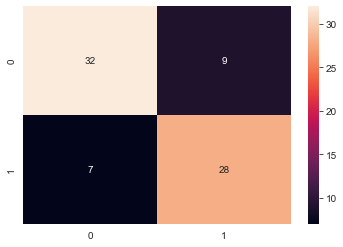

Negative AUC:  0.7902439024390244


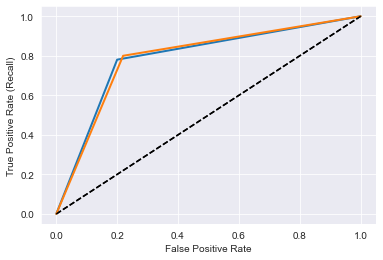

Positive AUC:  0.7902439024390244


(69.36936936936937, 74.75728155339806, 73.568281938326, 71.96261682242991)

In [146]:
DT_alg(X_r, y_r, Xr_train, Xr_test, yr_train, yr_test)

From the scores above we can see that the accuracy of the model increases when we use 10 cross validation and find the average of it in comparison with the original accuracy of the model that is highlighted above the cross validation accuracy, there is a significant increase, suggesting that using 10 cross validation is beneficial. One reason for this situation occuring is that everytiume there is a split that occurs in the dataset, the type of data that is split may cause a fluctuations in the accuracy and other scores as well, in this part we specifically concentrated upon the part which included finding the accuracy of the model. Cross validation takes that into consideration and causes this process this to occur k amount of times which when averaged can give us a much more valid insight into the accuracy of the model in place of the original way of calculating the accuracy.

In [152]:
dt2 = DecisionTreeClassifier(random_state=42, max_depth=4)

In [153]:
def DT_alg2(X, y, X_train, X_test, y_train, y_test):

    #using the model to predict
    y_pred = dt2.fit(X_train, y_train).predict(X_test)

    y_train_pred = cross_val_predict(dt2, X_train, y_train, cv=2)
    # creating the confusion matrix to analyse our data
    conf_matrix = confusion_matrix(y_test, y_pred)
    print()
    # Sensitivity of our data
    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity (True Positive Rate): ', 100*sensitivity )

    # Specificity of our data
    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity (True Negative Rate) : ', 100*specificity)

    # Getting the precision, recall, accuracy and f1 scores of our data
    precision = 100*precision_score(y_train, y_train_pred, pos_label='Positive')
    recall = 100*recall_score(y_train, y_train_pred, pos_label='Positive')
    accuracy = 100*accuracy_score(y_train, y_train_pred)
    f1 = 100*f1_score(y_train, y_train_pred, pos_label='Positive')

    print('Precision Score: ', precision) 
    print('Recall Score: ', recall) 
    print('Accuracy Score: ', accuracy) 
    print('F1 Score: ', f1)
    print('')
    print('')
    print('Cross Validation scores:')
    #cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)
    cv_accuracy = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring = 'accuracy')
    #print('cv precision: ', cv_accuracy)    
    #calculating average of all the cross validation scores
    #cross_val_avg = sum(cv)/len(cv)
    #print('Average of 10 cross validation: ' , cross_val_avg)
    cross_val_accuracy_avg = sum(cv_accuracy)/len(cv_accuracy)
    print('Average of 10 cross validation of the accuracy score: ' , 100*cross_val_accuracy_avg)
    print('')
    print('')
    print(classification_report(y_train, y_train_pred))

    #Plotting the confusion matrix
    sns.heatmap(conf_matrix, annot=True)
    plt.show()

    #Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = dt.predict_proba(X_test)[: ,0], pos_label='Negative')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Negative Rate")
    plt.ylabel("True Negative Rate (Recall)")
    print('Negative AUC: ',auc(fpr,tpr))
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = dt.predict_proba(X_test)[: ,1], pos_label='Positive')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.show()
    print('Positive AUC: ', auc(fpr,tpr))
    return precision, recall, accuracy, f1


Sensitivity (True Positive Rate):  85.36585365853658
Specificity (True Negative Rate) :  82.85714285714286
Precision Score:  74.74747474747475
Recall Score:  71.84466019417476
Accuracy Score:  76.2114537444934
F1 Score:  73.26732673267327


Cross Validation scores:
Average of 10 cross validation of the accuracy score:  73.86021505376344


              precision    recall  f1-score   support

    Negative       0.77      0.80      0.79       124
    Positive       0.75      0.72      0.73       103

    accuracy                           0.76       227
   macro avg       0.76      0.76      0.76       227
weighted avg       0.76      0.76      0.76       227



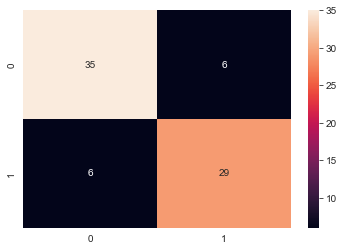

Negative AUC:  0.7902439024390244


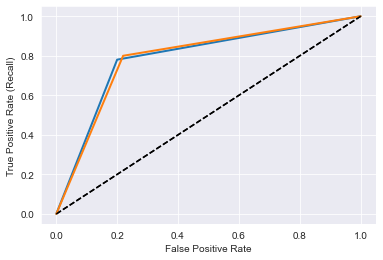

Positive AUC:  0.7902439024390244


(74.74747474747475, 71.84466019417476, 76.2114537444934, 73.26732673267327)

In [154]:
DT_alg2(X_r, y_r, Xr_train, Xr_test, yr_train, yr_test)

When I decrease the max depth of the decision tree, the normal accruacy increases and the 10 fold cross validation accuracy average had decreased in comparison to earlier when there was no max depth defined as well as when the max depth is higher. All other scores increased except for the recall score which decreased.

## Moving 30% and then 60% of the instances from the original training set into the testing set 

In [175]:
from sklearn.model_selection import train_test_split

# splitting my data into test and train data test 30 train 60
def split3060(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42, test_size=0.30, train_size=0.60)

    return X_train, X_test, y_train, y_test

# splitting my data into test and train data test 30 train 60
def split6030(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42, test_size=0.60, train_size=0.30)

    return X_train, X_test, y_train, y_test

# All data
Xr1_train, Xr1_test, yr1_train, yr1_test = split3060(X_r, y_r)

# Highly correlating values
Xr2_train, Xr2_test, yr2_train, yr2_test = split6030(X_r, y_r)

In [176]:
def DT3_alg(X, y, X_train, X_test, y_train, y_test):

    #using the model to predict
    y_pred = dt.fit(X_train, y_train).predict(X_test)

    y_train_pred = cross_val_predict(dt, X_train, y_train, cv=2)

    # creating the confusion matrix to analyse our data
    conf_matrix = confusion_matrix(y_test, y_pred)
    print()

    # Sensitivity of our data
    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity (True Positive Rate): ', 100*sensitivity )

    # Specificity of our data
    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity (True Negative Rate) : ', 100*specificity)

    # Getting the precision, recall, accuracy and f1 scores of our data
    precision = 100*precision_score(y_train, y_train_pred, pos_label='Positive')
    recall = 100*recall_score(y_train, y_train_pred, pos_label='Positive')
    accuracy = 100*accuracy_score(y_train, y_train_pred)
    f1 = 100*f1_score(y_train, y_train_pred, pos_label='Positive')

    print('Precision Score: ', precision) 
    print('Recall Score: ', recall) 
    print('Accuracy Score: ', accuracy) 
    print('F1 Score: ', f1)
    print('')
    print('')
    print('Cross Validation scores:')
    cv_accuracy = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring = 'accuracy')
    cross_val_accuracy_avg = sum(cv_accuracy)/len(cv_accuracy)
    print('Average of 10 cross validation of the accuracy score: ' , 100*cross_val_accuracy_avg)
    return precision, recall, accuracy, f1

In [177]:
DT3_alg(X_r, y_r, Xr1_train, Xr1_test, yr1_train, yr1_test)


Sensitivity (True Positive Rate):  74.46808510638297
Specificity (True Negative Rate) :  65.9090909090909
Precision Score:  69.23076923076923
Recall Score:  65.85365853658537
Accuracy Score:  71.27071823204419
F1 Score:  67.5


Cross Validation scores:
Average of 10 cross validation of the accuracy score:  74.18279569892474


(69.23076923076923, 65.85365853658537, 71.27071823204419, 67.5)

In [178]:
DT3_alg(X_r, y_r, Xr2_train, Xr2_test, yr2_train, yr2_test)


Sensitivity (True Positive Rate):  75.75757575757575
Specificity (True Negative Rate) :  68.67469879518072
Precision Score:  73.68421052631578
Recall Score:  66.66666666666666
Accuracy Score:  73.33333333333333
F1 Score:  70.0


Cross Validation scores:
Average of 10 cross validation of the accuracy score:  75.17204301075269


(73.68421052631578, 66.66666666666666, 73.33333333333333, 70.0)

When the split of data is 30% test and 60% train (lets call it X) and the split of data is 60% test and 30% train (lets call this Y). Y displays a higher scores on all parts in comparison to X but the sensitivity and specifity values are lower.  

## Experimenting with different Decision Tree parameters

>1, train: 0.768, test: 0.692
>2, train: 0.812, test: 0.670
>3, train: 0.856, test: 0.813
>4, train: 0.901, test: 0.736
>5, train: 0.950, test: 0.780
>6, train: 0.983, test: 0.714
>7, train: 1.000, test: 0.791
>8, train: 1.000, test: 0.780
>9, train: 1.000, test: 0.780
>10, train: 1.000, test: 0.736
>11, train: 1.000, test: 0.725
>12, train: 1.000, test: 0.736
>13, train: 1.000, test: 0.736
>14, train: 1.000, test: 0.736
>15, train: 1.000, test: 0.736
>16, train: 1.000, test: 0.692
>17, train: 1.000, test: 0.736
>18, train: 1.000, test: 0.747
>19, train: 1.000, test: 0.758
>20, train: 1.000, test: 0.681


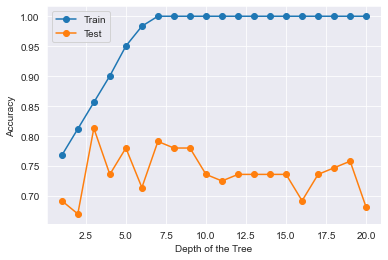

In [202]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(Xr_train, yr_train)
	# evaluate on the train dataset
	train_yhat = model.predict(Xr_train)
	train_acc = accuracy_score(yr_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(Xr_test)
	test_acc = accuracy_score(yr_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.xlabel('Depth of the Tree')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

From the graph above we can observe that around after the depth of 7 the data is being overfitted in the test phase thus showing an over generalization of the decision tree.|

## Pruning

### Pre-Pruning

In [216]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [i for i in range(1, 21)],
    "min_samples_split": [i for i in range(1, 15)],
    "min_samples_leaf": [i for i in range(1, 10)]
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(Xr_train, yr_train)

print("Best Parameters for Grid Search", grid_cv.best_params_)
print("AUC ROC CV Score for Grid Search", grid_cv.best_score_)
print("Train AUC ROC Score for Grid Search: ", roc_auc_score(y_true = yr_train, y_score = grid_cv.predict_proba(Xr_train)[: ,0]))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_true = yr_test, y_score = grid_cv.predict_proba(Xr_test)[: ,0]))


Best Parameters for Grid Search {'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}
AUC ROC CV Score for Grid Search 0.854243493132382
Train AUC ROC Score for Grid Search:  0.05721852673072185
Test AUC ROC Score for GS:  0.14756097560975612


C:\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.72196168 0.72196168 ... 0.84171076 0.84171076 0.84171076]
  warnings.warn(


#### How the AUC ROC score changes with the number of min samples leaf

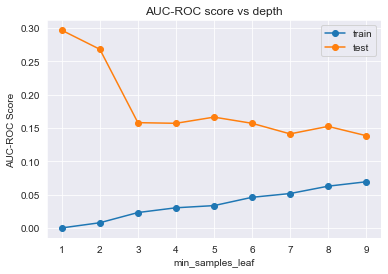

In [221]:
train_scores = []
test_scores = []
for i in param_grid["min_samples_leaf"]:
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=i)
    clf.fit(Xr_train, yr_train)
    train_scores.append(roc_auc_score(y_true = yr_train, y_score = clf.predict_proba(Xr_train)[: ,0]))
    test_scores.append(roc_auc_score(y_true =  yr_test, y_score = clf.predict_proba(Xr_test)[: ,0]))

fig, ax = plt.subplots()
ax.set_xlabel("min_samples_leaf")
ax.set_ylabel("AUC-ROC Score")
ax.set_title("AUC-ROC score vs depth")
ax.plot(param_grid["min_samples_leaf"], train_scores, marker='o', label="train")
ax.plot(param_grid["min_samples_leaf"], test_scores, marker='o', label="test")
ax.legend()
plt.show()

#### How the AUC ROC curve changes with the depth of the tree

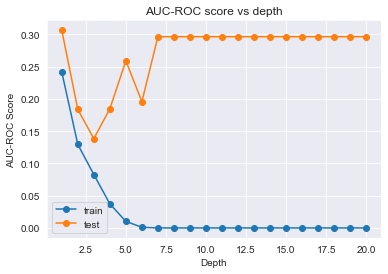

In [218]:
train_scores = []
test_scores = []
for i in param_grid['max_depth']:
    clf = DecisionTreeClassifier(random_state=42, max_depth=i)
    clf.fit(Xr_train, yr_train)
    train_scores.append(roc_auc_score(y_true = yr_train, y_score = clf.predict_proba(Xr_train)[: ,0]))
    test_scores.append(roc_auc_score(y_true =  yr_test, y_score = clf.predict_proba(Xr_test)[: ,0]))

fig, ax = plt.subplots()
ax.set_xlabel("Depth")
ax.set_ylabel("AUC-ROC Score")
ax.set_title("AUC-ROC score vs depth")
ax.plot(param_grid['max_depth'], train_scores, marker='o', label="train")
ax.plot(param_grid['max_depth'], test_scores, marker='o', label="test")
ax.legend()
plt.show()

### Post Pruning 

In [183]:
# Allow a decision tree to grow to its full depth
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xr_train, yr_train)

# compute ccp_alpha values
path = dt.cost_complexity_pruning_path(Xr_train, yr_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(Xr_train, yr_train)
    clfs.append(clf)



In [189]:
# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
train_scores = [roc_auc_score(y_true = yr_train, y_score = clf.predict_proba(Xr_train)[: ,0]) for clf in clfs]
test_scores = [roc_auc_score(y_true =  yr_test, y_score = clf.predict_proba(Xr_test)[: ,0]) for clf in clfs]


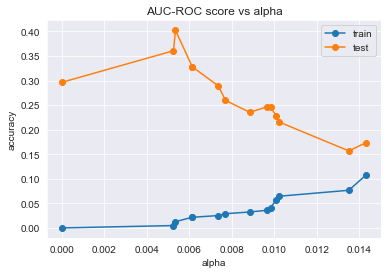

In [190]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

## Random Forest

### Part 1

In [227]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [229]:
def RF_alg(model, X, y, X_train, X_test, y_train, y_test):

    #using the model to predict
    y_pred = model.fit(X_train, y_train).predict(X_test)

    y_train_pred = cross_val_predict(model, X_train, y_train, cv=2)
    # creating the confusion matrix to analyse our data
    conf_matrix = confusion_matrix(y_test, y_pred)
    print()
    # Sensitivity of our data
    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity (True Positive Rate): ', 100*sensitivity )

    # Specificity of our data
    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity (True Negative Rate) : ', 100*specificity)

    # Getting the precision, recall, accuracy and f1 scores of our data
    precision = 100*precision_score(y_train, y_train_pred, pos_label='Positive')
    recall = 100*recall_score(y_train, y_train_pred, pos_label='Positive')
    accuracy = 100*accuracy_score(y_train, y_train_pred)
    f1 = 100*f1_score(y_train, y_train_pred, pos_label='Positive')

    print('Precision Score: ', precision) 
    print('Recall Score: ', recall) 
    print('Accuracy Score: ', accuracy) 
    print('F1 Score: ', f1)
    print('')
    print('')
    print('Cross Validation scores:')
    #cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=10)
    cv_accuracy = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring = 'accuracy')
    #print('cv precision: ', cv_accuracy)    
    #calculating average of all the cross validation scores
    #cross_val_avg = sum(cv)/len(cv)
    #print('Average of 10 cross validation: ' , cross_val_avg)
    cross_val_accuracy_avg = sum(cv_accuracy)/len(cv_accuracy)
    print('Average of 10 cross validation of the accuracy score: ' , 100*cross_val_accuracy_avg)
    print('')
    print('')
    print(classification_report(y_train, y_train_pred))

    #Plotting the confusion matrix
    sns.heatmap(conf_matrix, annot=True)
    plt.show()

    #Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = dt.predict_proba(X_test)[: ,0], pos_label='Negative')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Negative Rate")
    plt.ylabel("True Negative Rate (Recall)")
    print('Negative AUC: ',auc(fpr,tpr))
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = dt.predict_proba(X_test)[: ,1], pos_label='Positive')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.show()
    print('Positive AUC: ', auc(fpr,tpr))
    return precision, recall, accuracy, f1


Sensitivity (True Positive Rate):  84.31372549019608
Specificity (True Negative Rate) :  82.5
Precision Score:  78.66666666666666
Recall Score:  71.95121951219512
Accuracy Score:  78.45303867403315
F1 Score:  75.1592356687898


Cross Validation scores:
Average of 10 cross validation of the accuracy score:  75.18279569892474


              precision    recall  f1-score   support

    Negative       0.78      0.84      0.81        99
    Positive       0.79      0.72      0.75        82

    accuracy                           0.78       181
   macro avg       0.78      0.78      0.78       181
weighted avg       0.78      0.78      0.78       181



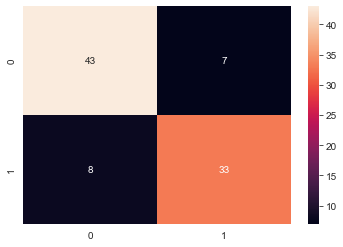

Negative AUC:  0.7036585365853658


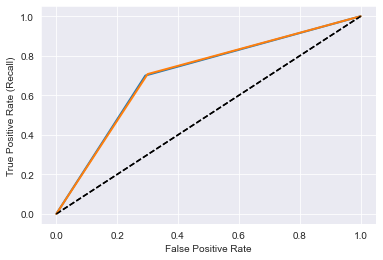

Positive AUC:  0.7036585365853658


(78.66666666666666, 71.95121951219512, 78.45303867403315, 75.1592356687898)

In [230]:
RF_alg(rf, X_r, y_r, Xr_train, Xr_test, yr_train, yr_test)

In comparison to decision trees, the random forest model has a far higher accuracy but what is interesting is when using 10 fold cross validation, the accuracy drop, which on the contrary increased when the 10 fold cross validation was applied to decision trees.

### Random Forest with different amounts of test and train data

In [234]:
def RF2_alg(X, y, X_train, X_test, y_train, y_test):

    #using the model to predict
    y_pred = rf.fit(X_train, y_train).predict(X_test)

    y_train_pred = cross_val_predict(rf, X_train, y_train, cv=2)

    # creating the confusion matrix to analyse our data
    conf_matrix = confusion_matrix(y_test, y_pred)
    print()

    # Sensitivity of our data
    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity (True Positive Rate): ', 100*sensitivity )

    # Specificity of our data
    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity (True Negative Rate) : ', 100*specificity)

    # Getting the precision, recall, accuracy and f1 scores of our data
    precision = 100*precision_score(y_train, y_train_pred, pos_label='Positive')
    recall = 100*recall_score(y_train, y_train_pred, pos_label='Positive')
    accuracy = 100*accuracy_score(y_train, y_train_pred)
    f1 = 100*f1_score(y_train, y_train_pred, pos_label='Positive')

    print('Precision Score: ', precision) 
    print('Recall Score: ', recall) 
    print('Accuracy Score: ', accuracy) 
    print('F1 Score: ', f1)
    print('')
    print('')
    print('Cross Validation scores:')
    cv_accuracy = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring = 'accuracy')
    cross_val_accuracy_avg = sum(cv_accuracy)/len(cv_accuracy)
    print('Average of 10 cross validation of the accuracy score: ' , 100*cross_val_accuracy_avg)
    return precision, recall, accuracy, f1

In [237]:
RF2_alg(X_r, y_r, Xr_train, Xr_test, yr_train, yr_test)


Sensitivity (True Positive Rate):  84.31372549019608
Specificity (True Negative Rate) :  82.5
Precision Score:  78.66666666666666
Recall Score:  71.95121951219512
Accuracy Score:  78.45303867403315
F1 Score:  75.1592356687898


Cross Validation scores:
Average of 10 cross validation of the accuracy score:  75.83870967741937


(78.66666666666666, 71.95121951219512, 78.45303867403315, 75.1592356687898)

In [235]:
RF2_alg(X_r, y_r, Xr1_train, Xr1_test, yr1_train, yr1_test)


Sensitivity (True Positive Rate):  84.31372549019608
Specificity (True Negative Rate) :  82.5
Precision Score:  78.66666666666666
Recall Score:  71.95121951219512
Accuracy Score:  78.45303867403315
F1 Score:  75.1592356687898


Cross Validation scores:
Average of 10 cross validation of the accuracy score:  74.8494623655914


(78.66666666666666, 71.95121951219512, 78.45303867403315, 75.1592356687898)

In [236]:
RF2_alg(X_r, y_r, Xr2_train, Xr2_test, yr2_train, yr2_test)


Sensitivity (True Positive Rate):  83.50515463917526
Specificity (True Negative Rate) :  76.47058823529412
Precision Score:  72.97297297297297
Recall Score:  64.28571428571429
Accuracy Score:  72.22222222222221
F1 Score:  68.35443037974683


Cross Validation scores:
Average of 10 cross validation of the accuracy score:  76.83870967741935


(72.97297297297297, 64.28571428571429, 72.22222222222221, 68.35443037974683)

Above we can see when we alot a lot of data to the data instead of the train data, the accuracy overall experiences a significant drop but the cross validation accuracy score average is higher. 

### Part 2 

#### Depth

>1, train: 0.851, test: 0.835
>2, train: 0.862, test: 0.846
>3, train: 0.895, test: 0.835
>4, train: 0.934, test: 0.846
>5, train: 0.961, test: 0.835
>6, train: 0.983, test: 0.835
>7, train: 0.994, test: 0.824
>8, train: 1.000, test: 0.835
>9, train: 1.000, test: 0.813
>10, train: 1.000, test: 0.835
>11, train: 1.000, test: 0.835
>12, train: 1.000, test: 0.835
>13, train: 1.000, test: 0.835
>14, train: 1.000, test: 0.835
>15, train: 1.000, test: 0.835
>16, train: 1.000, test: 0.835
>17, train: 1.000, test: 0.835
>18, train: 1.000, test: 0.835
>19, train: 1.000, test: 0.835
>20, train: 1.000, test: 0.835


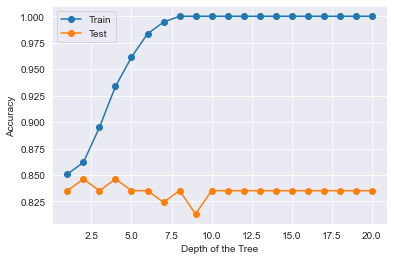

In [238]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=42, max_depth=i)
	# fit model on the training dataset
	model.fit(Xr_train, yr_train)
	# evaluate on the train dataset
	train_yhat = model.predict(Xr_train)
	train_acc = accuracy_score(yr_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(Xr_test)
	test_acc = accuracy_score(yr_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.xlabel('Depth of the Tree')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

As we can see above, as the depth of the tree increases when using random forest, the accuracy tends to decrease. 

#### Pruning

In [242]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [i for i in range(1, 21)],
    "min_samples_split": [i for i in range(1, 15)],
    "min_samples_leaf": [i for i in range(1, 10)]
}

clf = RandomForestClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(Xr_train, yr_train)

print("Best Parameters for Grid Search", grid_cv.best_params_)
print("AUC ROC CV Score for Grid Search", grid_cv.best_score_)
print("Train AUC ROC Score for Grid Search: ", roc_auc_score(y_true = yr_train, y_score = grid_cv.predict_proba(Xr_train)[: ,0]))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_true = yr_test, y_score = grid_cv.predict_proba(Xr_test)[: ,0]))


Best Parameters for Grid Search {'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}
AUC ROC CV Score for Grid Search 0.9180695847362514
Train AUC ROC Score for Grid Search:  0.038309928553830995
Test AUC ROC Score for GS:  0.09707317073170732


C:\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.90423414 0.90423414 ... 0.90958527 0.90958527 0.90958527]
  warnings.warn(


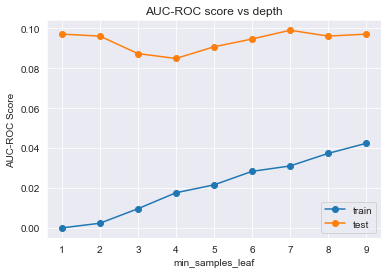

In [243]:
train_scores = []
test_scores = []
for i in param_grid["min_samples_leaf"]:
    clf = RandomForestClassifier(random_state=42, min_samples_leaf=i)
    clf.fit(Xr_train, yr_train)
    train_scores.append(roc_auc_score(y_true = yr_train, y_score = clf.predict_proba(Xr_train)[: ,0]))
    test_scores.append(roc_auc_score(y_true =  yr_test, y_score = clf.predict_proba(Xr_test)[: ,0]))

fig, ax = plt.subplots()
ax.set_xlabel("min_samples_leaf")
ax.set_ylabel("AUC-ROC Score")
ax.set_title("AUC-ROC score vs depth")
ax.plot(param_grid["min_samples_leaf"], train_scores, marker='o', label="train")
ax.plot(param_grid["min_samples_leaf"], test_scores, marker='o', label="test")
ax.legend()
plt.show()

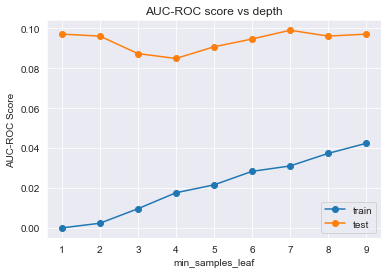

In [244]:
train_scores = []
test_scores = []
for i in param_grid["min_samples_leaf"]:
    clf = RandomForestClassifier(random_state=42, min_samples_leaf=i)
    clf.fit(Xr_train, yr_train)
    train_scores.append(roc_auc_score(y_true = yr_train, y_score = clf.predict_proba(Xr_train)[: ,0]))
    test_scores.append(roc_auc_score(y_true =  yr_test, y_score = clf.predict_proba(Xr_test)[: ,0]))

fig, ax = plt.subplots()
ax.set_xlabel("min_samples_leaf")
ax.set_ylabel("AUC-ROC Score")
ax.set_title("AUC-ROC score vs depth")
ax.plot(param_grid["min_samples_leaf"], train_scores, marker='o', label="train")
ax.plot(param_grid["min_samples_leaf"], test_scores, marker='o', label="test")
ax.legend()
plt.show()